In [1]:
import pyforest
from scipy import stats

In [2]:
data=pd.read_csv('data.csv')
data.head()

<IPython.core.display.Javascript object>

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data=data.drop(['Unnamed: 32','id'],axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 31)

In [5]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

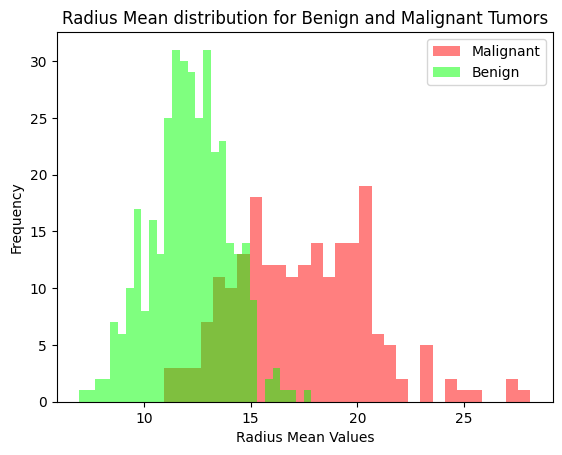

In [6]:
m=plt.hist(data[data.diagnosis=='M'].radius_mean,bins=30,fc=(1,0,0,0.5),label='Malignant')
b=plt.hist(data[data.diagnosis=='B'].radius_mean,bins=30,fc=(0,1,0,0.5),label='Benign')
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Radius Mean distribution for Benign and Malignant Tumors")
plt.show()

In [8]:
frequent_malignant_radius_mean=m[0].max()
index_frequent_malignant_radius_mean=list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean=m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ", most_frequent_malignant_radius_mean)

Most frequent malignant radius mean is:  20.101999999999997


In [9]:
data_benign=data[data.diagnosis=='B']
data_malignant=data[data.diagnosis=='M']

In [17]:
Q1=np.percentile(data_benign.radius_mean,25)
Q3=np.percentile(data_benign.radius_mean,75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"Anything ({lower_bound}-{upper_bound}) is an outlier")
print("Outliers: ",data_benign[(data_benign.radius_mean < lower_bound) | (data_benign.radius_mean > upper_bound)].radius_mean.values)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Anything (7.645000000000001-16.805) is an outlier
Outliers:  [ 6.981 16.84  17.85 ]


In [18]:
melted_data=pd.melt(data,id_vars='diagnosis',value_vars=['radius_mean','texture_mean'])
melted_data

<IPython.core.display.Javascript object>

,diagnosis,variable,value
0,M,radius_mean,17.99
1,M,radius_mean,20.57
2,M,radius_mean,19.69
3,M,radius_mean,11.42
4,M,radius_mean,20.29
...,...,...,...
1133,M,texture_mean,22.39
1134,M,texture_mean,28.25
1135,M,texture_mean,28.08
1136,M,texture_mean,29.33


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

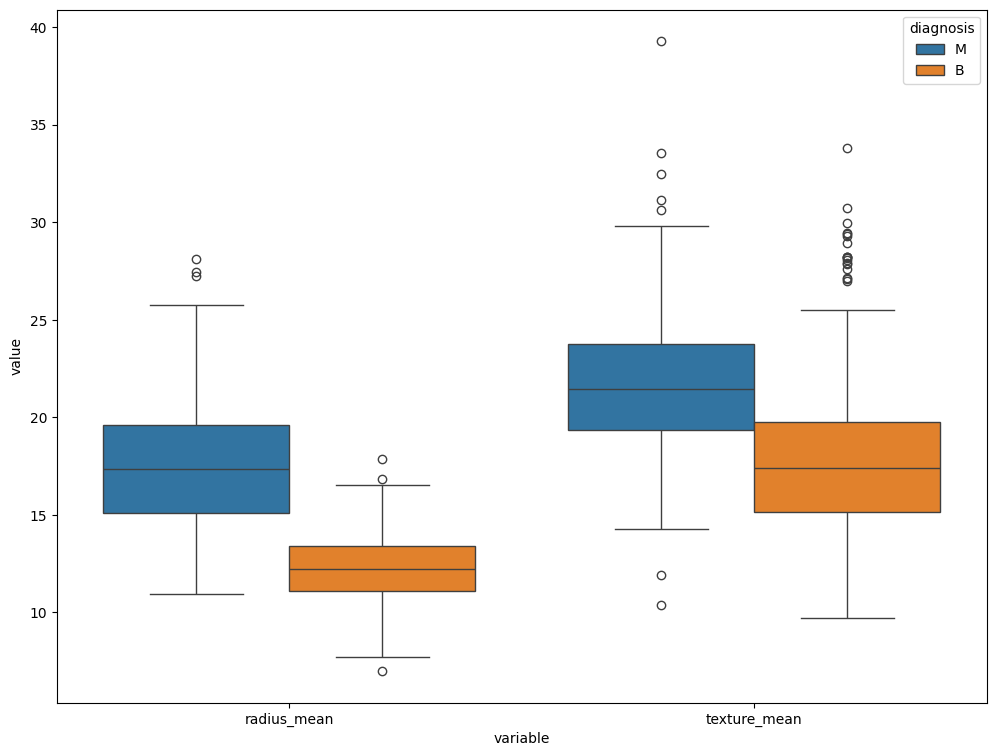

In [19]:
plt.figure(figsize=(12,9))
sns.boxplot(x='variable',y='value',data=melted_data,hue='diagnosis')
plt.show()

In [21]:
print("mean: ",data_benign.radius_mean.mean())
print("variance: ",data_benign.radius_mean.var())
print("standart deviation (std): ",data_benign.radius_mean.std())
print("describe method: ",data_benign.radius_mean.describe())

mean:  12.146523809523808
variance:  3.1702217220438738
standart deviation (std):  1.7805116461410393
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


CDF

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

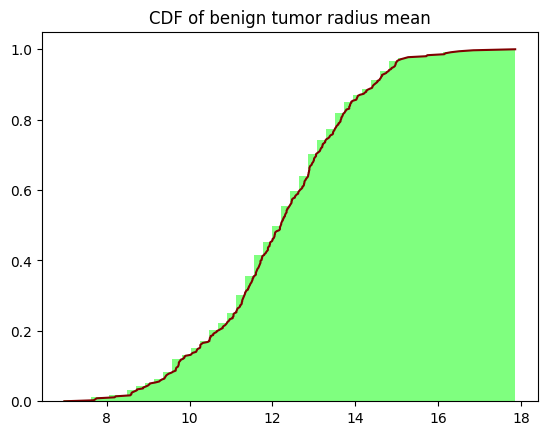

In [24]:
plt.hist(data_benign.radius_mean,bins=50,fc=(0,1,0,0.5),label='Benign',density=True,cumulative=True)
sorted_data=np.sort(data_benign.radius_mean)
y=np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='maroon')
plt.title('CDF of benign tumor radius mean')
plt.show()

In [25]:
mean_diff = data_malignant.radius_mean.mean() - data_benign.radius_mean.mean()
var_benign=data_benign.radius_mean.var()
var_malignant=data_malignant.radius_mean.var()
var_benign,var_malignant

(3.1702217220438738, 10.26543081462935)

In [26]:
var_pooled=(len(data_benign)*var_benign+len(data_malignant)*var_malignant)/float(len(data_benign)+len(data_malignant))
effect_size=mean_diff/np.sqrt(var_pooled)
print(f'Effect size: {effect_size}')

<IPython.core.display.Javascript object>

Effect size: 2.2048585165041414


Relationship between variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

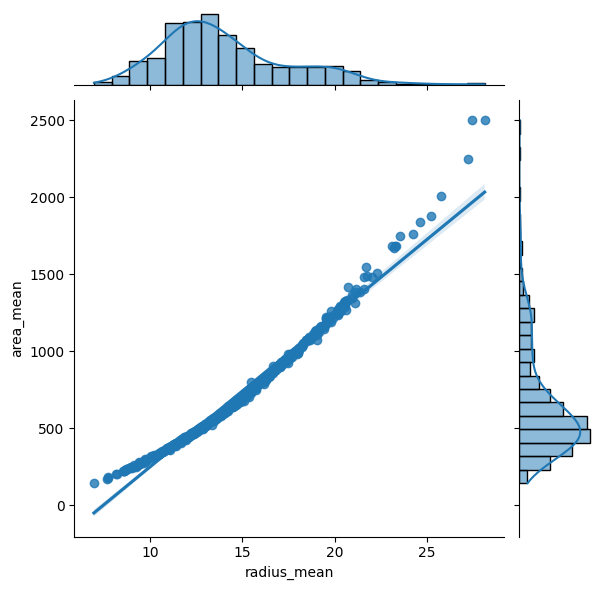

In [32]:
sns.jointplot(x=data.radius_mean,y=data.area_mean,kind="reg")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

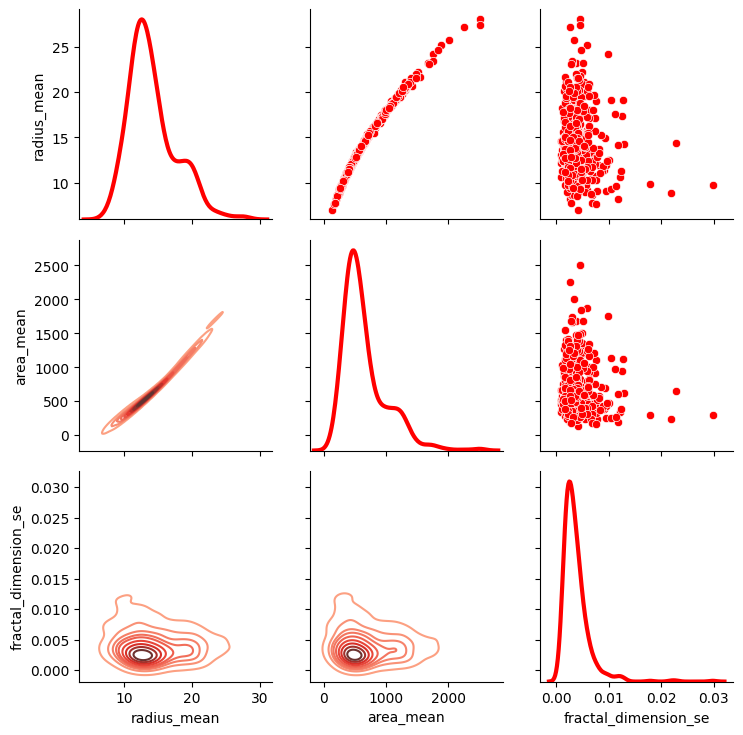

In [44]:
df=data.loc[:,["radius_mean", "area_mean", "fractal_dimension_se"]]
PGrid=sns.PairGrid(df,diag_sharey=False)
PGrid.map_lower(sns.kdeplot,cmap='Reds_d')
PGrid.map_upper(sns.scatterplot,color='red')
PGrid.map_diag(sns.kdeplot,lw=3,color='red')
plt.show()

Correlation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

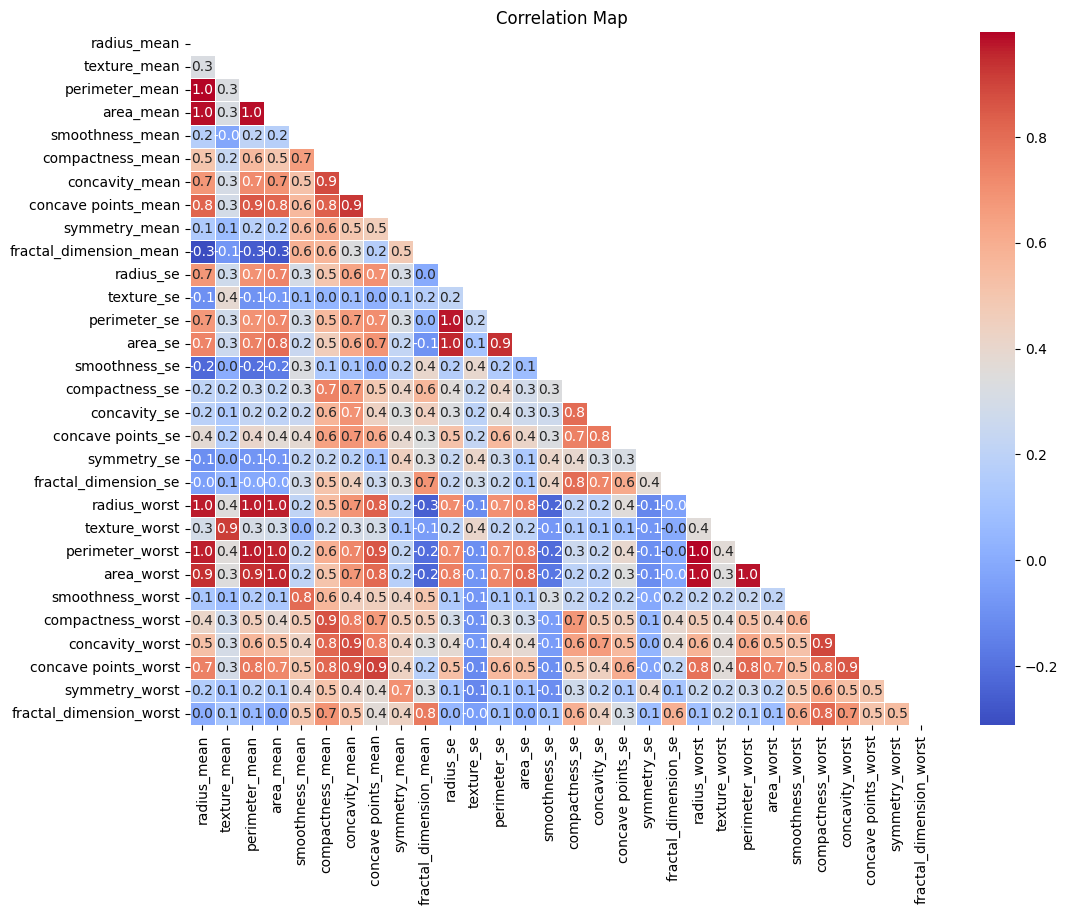

In [51]:
mask=np.triu(np.ones_like(data.corr(numeric_only=True),dtype=bool))
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm',linewidths=0.5,fmt='.1f',mask=mask)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Map")
plt.savefig('graph.png')
plt.show()



Covariance

In [52]:
np.cov(data.radius_mean,data.area_mean)
print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

<IPython.core.display.Javascript object>

Covariance between radius mean and area mean:  1224.483409346457
Covariance between radius mean and fractal dimension se:  -0.000397624857644063


Pearson correlation

In [54]:
p1=data.loc[:,["area_mean","radius_mean"]].corr(method='pearson')
p2=data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print("Pearson Correlation:")
print(p1)
print("Pearson Correlation:",p2)

Pearson Correlation:
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson Correlation: 0.9873571700566126


Spearman's Rank correlation

In [57]:
ranked_data=data.rank()
spearman=ranked_data.loc[:,["area_mean","radius_mean"]].corr(method='spearman')
print('Spearman correlation')
print(spearman)

Spearman correlation
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


Hypothesis testing

In [60]:
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


Gaussian distribution and z-score

In [61]:
np.random.seed(40)
mu,sigma=110,20
s=np.random.normal(mu,sigma,100000)
print('Mean=',np.mean(s))
print('Standard deviation=',np.std(s))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean= 110.06447710997112


<IPython.core.display.Javascript object>

Standard deviation= 20.05600308696215


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

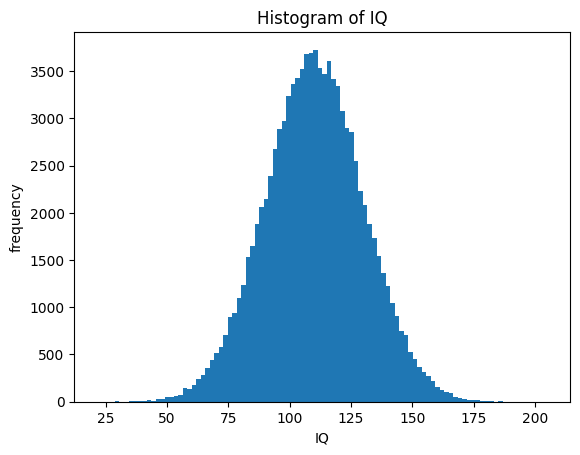

In [62]:
plt.hist(s,100,density=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()